In [14]:
import sys

# prove the conda env is correct
#print(sys.executable)

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(2377, 3695)


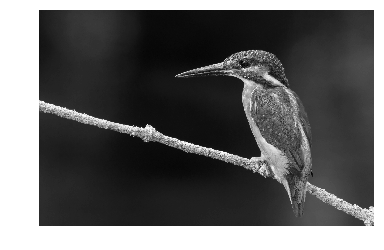

In [16]:
# read the image as grayscale in order to hash one channel
img = cv2.imread("test_imgs/bird.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.axis("off")
# display the image as grayscale
plt.imshow(img, cmap="gray")
plt.show()

In [17]:
HASH_SIZE = 8

dim = (HASH_SIZE + 1, HASH_SIZE)

res = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)

(8, 9)


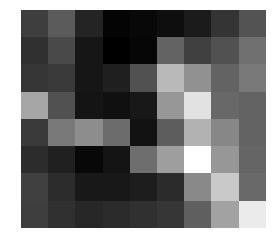

In [18]:
print(res.shape)
plt.axis("off")
# display the image as grayscale
plt.imshow(res, cmap="gray")
plt.show()

In [19]:
def dhash(image, hashSize=8):
  # resize the input image, adding a single column (width) so we
  # can compute the horizontal gradient
  resized = cv2.resize(image, (hashSize + 1, hashSize))
 
  # compute the (relative) horizontal gradient between adjacent column pixels
  diff = resized[:, 1:] > resized[:, :-1]
 
  #print(diff)
    
  print(diff.shape)
  plt.axis("off")
  # display the image as grayscale
  plt.imshow(diff, cmap="gray")
  plt.show()

  # convert the difference image to a hash (perceptual difference)
  return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])
  #return diff

In [20]:
def dhash2(image, hashSize=8):
  plt.imshow(image, cmap="gray")
  plt.show()

  # resize the input image, adding a single column (width) so we
  # can compute the horizontal gradient
  resized = cv2.resize(image, (hashSize + 1, hashSize))
 
  # compute the (relative) horizontal gradient between adjacent column pixels
  diff = resized[:, 1:] > resized[:, :-1]
 
  #print(diff)
    
  #print(diff.shape)
  #plt.axis("off")
  # display the image as grayscale
  plt.imshow(diff, cmap="gray")
  plt.show()

  # convert the difference image to a hash (perceptual difference)
  #return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])
  return diff.flatten()

(8, 8)


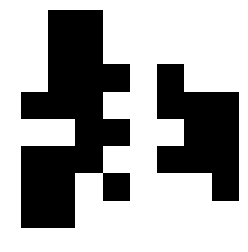

18191191402595088889


In [21]:
hash = dhash(img, HASH_SIZE)
print(hash)

In [22]:
#road2.jpg
needle = 10929794165987293292

haystack = {}
haystack[8164012587476474118] = "test_imgs/road1.jpg"
haystack[6171281278891305323] = "test_imgs/road3.jpg"
haystack[10929794165987293292] = "test_imgs/road4.jpg"
haystack[10929794164905162860] = "test_imgs/road5.jpg"
haystack[10929794165987293292] = "test_imgs/road6.jpg"

In [23]:
for key, value in haystack.items():
    print(value)
    print(needle - key)

test_imgs/road1.jpg
2765781578510819174
test_imgs/road3.jpg
4758512887095987969
test_imgs/road6.jpg
0
test_imgs/road5.jpg
1082130432


In [24]:
from scipy.spatial import distance as dist

# compare arrays of bits

x = np.random.randint(2, size = 4)
y = np.random.randint(2, size = 4)
print(x)
print(y)
dist.hamming(x, y)



[1 1 1 0]
[1 1 0 0]


0.25

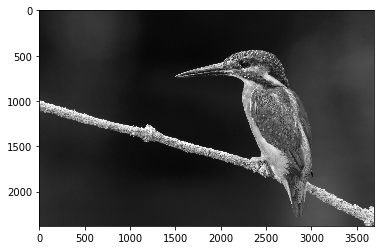

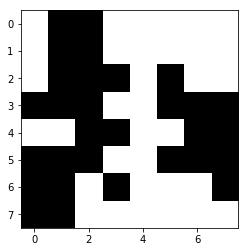

[1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1]
18191191402595088889


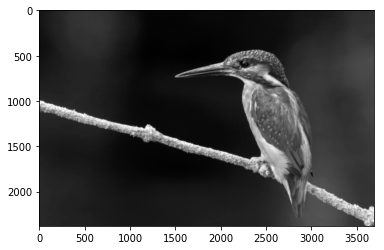

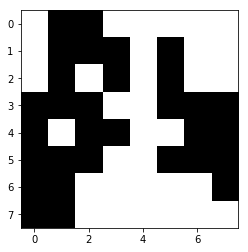

[1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
18191191402595088889
similar
5
similar
0.078125
0
(9, 8)
[[0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


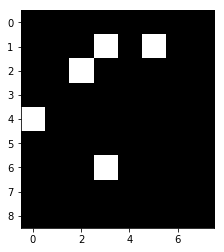

In [25]:
src = cv2.imread("test_imgs/bird.jpg", cv2.IMREAD_GRAYSCALE)

needle = dhash2(src, HASH_SIZE)
print(needle.astype(int))

needle_hash = sum([2 ** i for (i, v) in enumerate(needle) if v])
print(needle_hash)

MAX_KERNEL_LENGTH = 31
src2 = cv2.imread("test_imgs/bird.jpg", cv2.IMREAD_GRAYSCALE)
#hay = dhash2(src2, HASH_SIZE)
dst = cv2.GaussianBlur(src2, (MAX_KERNEL_LENGTH, MAX_KERNEL_LENGTH), 0)
hay = dhash2(dst, HASH_SIZE)

print(hay.astype(int))

hay_hash = sum([2 ** i for (i, v) in enumerate(needle) if v])
print(hay_hash)

delta = dist.hamming(needle, hay)
if delta == 0:
    print("identical")
elif delta < 0.1:
    print("similar")
else:
    print("different")
    
bit_delta = np.sum(needle != hay)
print(bit_delta)
if bit_delta == 0:
    print("identical")
elif bit_delta < 11:
    print("similar")
else:
    print("different")
    
print(dist.hamming(needle, hay))
print(hay_hash - needle_hash)

#print(needle.shape)
#print(needle)
bit_xor = np.resize(np.bitwise_xor(needle, hay), dim)
 
print(bit_xor.shape)
print(bit_xor.astype(int))
plt.imshow(bit_xor, cmap="gray")
plt.show()